# Predicting Medical Insurance Charges using Multiple Regression Models

In [1]:
# Import necessary libraries
import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
from sklearn.model_selection import train_test_split  # to split data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # to convert text data into numbers
from sklearn.metrics import mean_squared_error, mean_absolute_error  # to evaluate model performance
from sklearn.linear_model import Lasso, Ridge, ElasticNet  # regression models
from sklearn.ensemble import GradientBoostingRegressor  # ensemble regression model
from sklearn.svm import SVR  # support vector regression
from sklearn.neural_network import MLPRegressor  # neural network regression
import matplotlib.pyplot as plt

The above code imports essential libraries and tools required for building and evaluating machine learning regression models.
It uses pandas and numpy for data handling and numerical operations, while sklearn modules are used for 
data preprocessing, model training, and performance evaluation. The script includes various regression models such as 
linear models (Lasso, Ridge, ElasticNet), ensemble methods (GradientBoostingRegressor), support vector regression (SVR), 
and neural networks (MLPRegressor). Additionally, it includes functions for splitting the dataset, encoding categorical variables,
and calculating error metrics to assess model accuracy.

In [2]:
# Load the insurance dataset
data = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This code loads and previews an insurance dataset using the pandas library. The pd.read_csv('insurance.csv') function reads the CSV file into a DataFrame called data, allowing for easy data manipulation and analysis. The data.head() function then displays the first five rows of the dataset, helping users quickly understand the structure and contents of the data. The dataset includes columns such as age, sex, BMI, number of children, smoking status, region, and medical charges — which are all useful features for building machine learning models to predict insurance costs.

In [3]:
#Removing the null values

#identify missing using isnull()
missing_values=data.isnull()

#remove rows with missing values
data= data.dropna()

# Just checking if any null values are present or not
data.isnull().sum()

#check duplicate rows (If there is any "True" value then it's the duplicate row)
duplicates=data.duplicated()

# Removing duplicate rows
data_cleaned = data.drop_duplicates()
print("\nDataframe with no duplicates(Cleaned Data):")
data_cleaned


Dataframe with no duplicates(Cleaned Data):


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Convert categorical('sex','smoker','region') columns to numeric format using One-Hot Encoding

categorical_columns = ['sex','smoker','region']

# One-hot encoding
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True, dtype=int)

data_cleaned.head()  #displays the encoded DataFrame

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


This code uses LabelEncoder from sklearn.preprocessing to convert categorical text columns into numerical values, which is essential for machine learning models that require numerical input. Specifically, it transforms the 'sex', 'smoker', and 'region' columns from text (e.g., "male", "female", "yes", "no", etc.) to numeric labels (e.g., 0, 1, 2, ...). This step helps the model interpret and process the data effectively, making it ready for training and evaluation.

In [5]:
# Separate features (X) and target variable (y)
X = data_cleaned.drop('charges', axis=1)
y = data_cleaned['charges']

his code separates the dataset into input features (X) and the target variable (y) to prepare for machine learning model training. The X variable includes all columns except 'charges', which is the column we want to predict. The y variable contains only the 'charges' column, representing the insurance cost. This separation is crucial because machine learning algorithms learn patterns in the input features (X) to accurately predict the output or target variable (y).

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code splits the dataset into training and testing sets using the train_test_split function from scikit-learn. It allocates 80% of the data to training (X_train, y_train) and 20% to testing (X_test, y_test), as specified by test_size=0.2. The random_state=42 ensures reproducibility by setting a fixed seed for the random shuffling of data. This split allows the model to learn from the training data and be evaluated on the unseen test data, helping assess how well it generalizes to new information.

In [7]:
# Create a dictionary of regression models
models = {
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(max_iter=7000)
}

# List to store results
results = []

# Train each model, make predictions, and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append((name, mse, mae))

# Create a DataFrame to show comparison of model performance
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE'])
results_df


,Model,MSE,MAE
0,Lasso,3.547931e+07,4177.130359
1,Ridge,3.565688e+07,4194.009577
2,ElasticNet,4.806172e+07,4972.931325
3,GradientBoosting,1.824785e+07,2520.518271
4,SVR,2.084625e+08,9253.255175
5,MLPRegressor,3.816298e+07,4242.912216


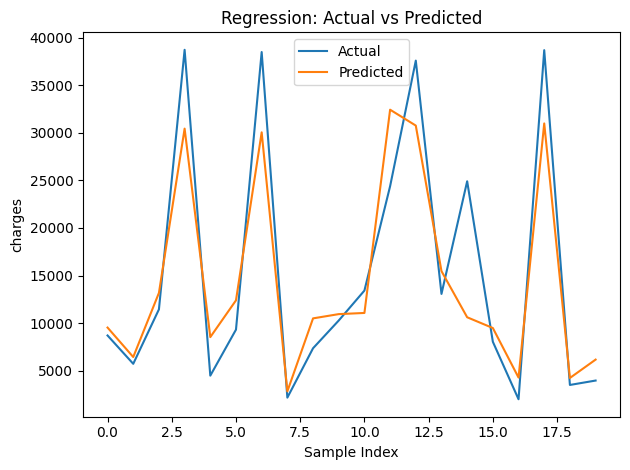

In [8]:
# Classification Visualization: Convert values to float
classification_plot_df = pd.DataFrame({
    'Actual': y_test.values[:20].astype(float),
    'Predicted': y_pred[:20].astype(float)
})

classification_plot_df.plot()
plt.title('Regression: Actual vs Predicted')
plt.xlabel("Sample Index")
plt.ylabel("charges")
plt.tight_layout()
plt.show()

This code compares the performance of multiple regression models on predicting insurance charges. It first creates a dictionary of models including Lasso, Ridge, ElasticNet, Gradient Boosting, Support Vector Regression (SVR), and a Neural Network (MLPRegressor). Each model is trained using the training data (X_train, y_train), and predictions are made on the test set (X_test). Model performance is evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE), which measure prediction accuracy. The results are stored in a list and converted into a DataFrame (results_df) to easily compare how well each model performs. This helps in selecting the most accurate model for the task.

# Student Exam Performance Classification


### This notebook predicts whether a student passed the math exam using three classification models:
### - Logistic Regression
### - Neural Network Classifier (MLPClassifier)
### - Gradient Boosting Classifier

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")  # Update path if needed

#Removing the null values

#identify missing using isnull()
missing_values=df.isnull()

#remove rows with missing values
df= df.dropna()

# Just checking if any null values are present or not
df.isnull().sum()

#check duplicate rows (If there is any "True" value then it's the duplicate row)
duplicates=df.duplicated()

# Removing duplicate rows
df_cleaned = df.drop_duplicates()
print("\nDataframe with no duplicates(Cleaned Data):")
df_cleaned

# Encode all object (categorical) columns using LabelEncoder
le = LabelEncoder()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_cleaned.loc[:, col] = le.fit_transform(df_cleaned[col])

# Create binary target variable: 1 if math score >= 50, else 0
df_cleaned['passed'] = (df_cleaned['math score'] >= 50).astype(int)

# Define features and target
X = df_cleaned.drop('passed', axis=1)
y = df_cleaned['passed']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- LOGISTIC REGRESSION ---
log_model = LogisticRegression(max_iter=3000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# --- NEURAL NETWORK (MLP CLASSIFIER) ---
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# --- GRADIENT BOOSTING CLASSIFIER ---
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    print(f"\n--- {name} ---")
    print(f"Accuracy: {acc:.2%}")
    print(f"Precision: {prec:.2%}")
    print(f"Recall (Sensitivity): {recall:.2%}")
    print(f"Specificity: {specificity:.2%}")

# Evaluate all models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("MLP Classifier", y_test, y_pred_mlp)
evaluate_model("Gradient Boosting Classifier", y_test, y_pred_gb)

# Calculate accuracy for each model
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Now you can create your results DataFrame
results = [
    ['Logistic Regression', accuracy_log],
    ['MLP Classifier', accuracy_mlp],
    ['Gradient Boosting Classifier', accuracy_gb]
]

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
results_df






Dataframe with no duplicates(Cleaned Data):

--- Logistic Regression ---
Accuracy: 99.00%
Precision: 98.81%
Recall (Sensitivity): 100.00%
Specificity: 94.12%

--- MLP Classifier ---
Accuracy: 95.50%
Precision: 95.38%
Recall (Sensitivity): 99.40%
Specificity: 76.47%

--- Gradient Boosting Classifier ---
Accuracy: 100.00%
Precision: 100.00%
Recall (Sensitivity): 100.00%
Specificity: 100.00%


,Model,Accuracy
0,Logistic Regression,0.990
1,MLP Classifier,0.955
2,Gradient Boosting Classifier,1.000


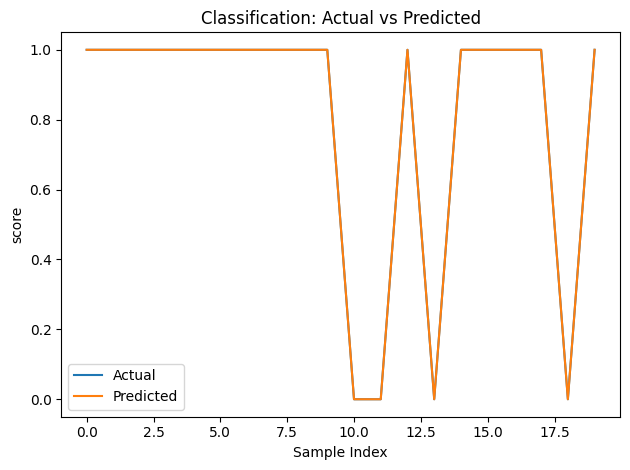

In [10]:

import pandas as pd
import matplotlib.pyplot as plt

# Classification Visualization: Convert values to float
classification_plot_df = pd.DataFrame({
    'Actual': y_test.values[:20].astype(float),
    'Predicted': y_pred_gb[:20].astype(float)
})
classification_plot_df.plot()
plt.title('Classification: Actual vs Predicted')
plt.xlabel("Sample Index")
plt.ylabel("score")
plt.tight_layout()
plt.show()
